# Exam R
Gabriele Pelucchi, 2010541 ; u784600

# Introduction

The exam consists of 2 parts. In the first part, you have to run a regression, test if the assumptions of a linear regression model are met, and make 2 graphs.

In the second part of the exam, you will have to make a map of Catholic and Protestant schools in the Netherlands.

# Packages


In [8]:
library(tidyverse)
library(gvlma)

-- Attaching packages --------------------------------------- tidyverse 1.2.1 --
<U+221A> ggplot2 2.2.1     <U+221A> purrr   0.2.4
<U+221A> tibble  1.4.2     <U+221A> dplyr   0.7.4
<U+221A> tidyr   0.8.0     <U+221A> stringr 1.3.0
<U+221A> readr   1.1.1     <U+221A> forcats 0.3.0
-- Conflicts ------------------------------------------ tidyverse_conflicts() --
x dplyr::filter() masks stats::filter()
x dplyr::lag()    masks stats::lag()


# Assignment 1


## Data

The data are given:


In [9]:
set.seed(123)
df1 <- as.data.frame(matrix(runif(1*50, min = 1, max = 10), ncol = 1)) %>%
    mutate(epsilon = rnorm(50, mean = 0, sd = 2)) %>%
    mutate(response = 3 - 2* V1  + epsilon) %>%
    mutate(group = ifelse(V1 <= 5, 1,2))

## Asignment 1a

The first assigment is to make boxplot using ggplot with group on the x-axis and V1 on the y-axis.

Warning message:
"Continuous x aesthetic -- did you forget aes(group=...)?"

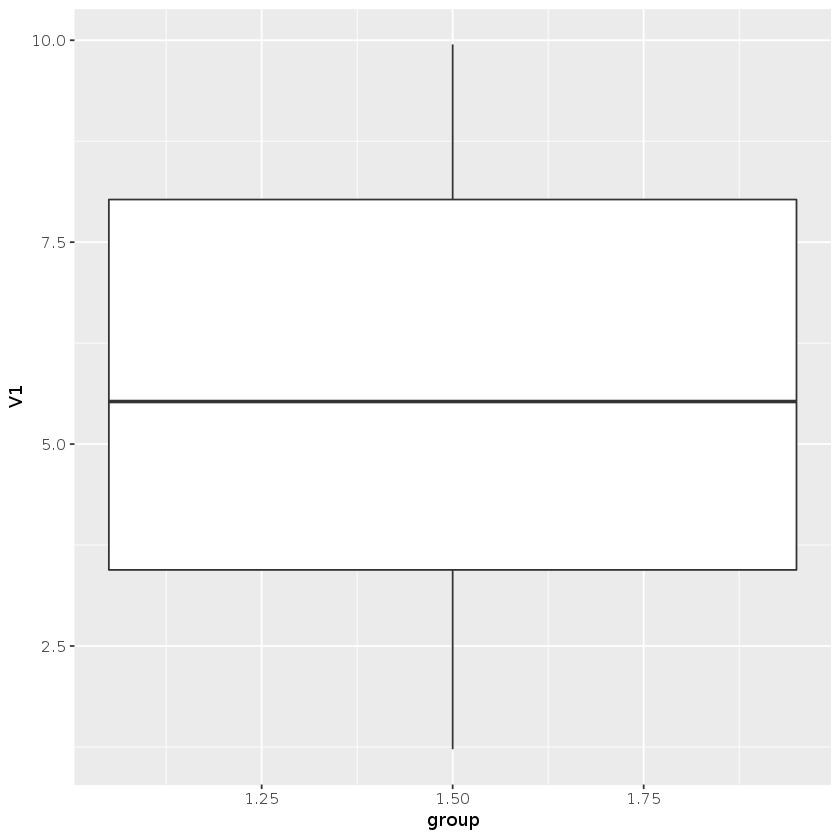

In [10]:


plot1 <- ggplot(data=df1, aes(x = group, y = V1)) +
        geom_boxplot()
plot1

## Assignment 1b

Run a regression with response variable as a function of V1.
Show the summary statistics of the regression.


In [11]:
reg1<- lm(data=df1, response ~ V1)


summary(reg1)


Call:
lm(formula = response ~ V1, data = df1)

Residuals:
    Min      1Q  Median      3Q     Max 
-4.5116 -1.1157 -0.1313  1.0985  4.3723 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)   2.6305     0.6347   4.145 0.000138 ***
V1           -1.9152     0.1014 -18.880  < 2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 1.881 on 48 degrees of freedom
Multiple R-squared:  0.8813,	Adjusted R-squared:  0.8788 
F-statistic: 356.4 on 1 and 48 DF,  p-value: < 2.2e-16


check if the assumptions of linear regression are met with the `gvlma()` function.

In [12]:
gvlma(reg1)


Call:
lm(formula = response ~ V1, data = df1)

Coefficients:
(Intercept)           V1  
      2.630       -1.915  


ASSESSMENT OF THE LINEAR MODEL ASSUMPTIONS
USING THE GLOBAL TEST ON 4 DEGREES-OF-FREEDOM:
Level of Significance =  0.05 

Call:
 gvlma(x = reg1) 

                      Value p-value                Decision
Global Stat        0.654319  0.9568 Assumptions acceptable.
Skewness           0.002398  0.9609 Assumptions acceptable.
Kurtosis           0.007200  0.9324 Assumptions acceptable.
Link Function      0.005852  0.9390 Assumptions acceptable.
Heteroscedasticity 0.638869  0.4241 Assumptions acceptable.

## Assignment 1c

Make a scatterplot with: 
* V1 on the x-axis and the response on the y-axis
* Include the regression line in red with confidence interval 
* In a classic theme
* The x-axis should be labeled "Predictor", the y-axis should be labeled ("Response")



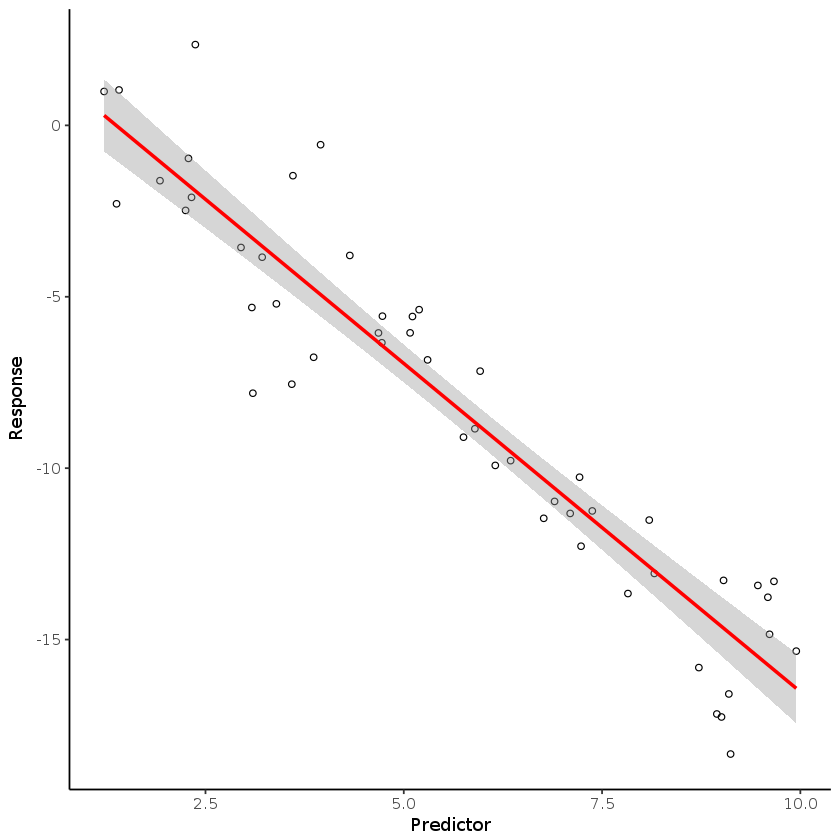

In [93]:
plot2 <-ggplot(data = df1, aes(x = V1, y = response)) +
  geom_point(shape=1) + geom_smooth(colour= 'red',method=lm) + xlab('Predictor') + ylab('Response') + theme_classic()
 plot2
  


# Assigment 2

# Packages

In [14]:
library(thematicmaps)
library(tidyverse)

Loading required package: maptools
Loading required package: sp
Checking rgeos availability: TRUE
Loading required package: digest
Loading required package: rgdal
rgdal: version: 1.2-16, (SVN revision 701)
 Geospatial Data Abstraction Library extensions to R successfully loaded
 Loaded GDAL runtime: GDAL 2.1.2, released 2016/10/24
 Path to GDAL shared files: /usr/share/gdal/2.1
 GDAL binary built with GEOS: TRUE 
 Loaded PROJ.4 runtime: Rel. 4.9.3, 15 August 2016, [PJ_VERSION: 493]
 Path to PROJ.4 shared files: (autodetected)
 Linking to sp version: 1.2-4 
Loading required package: rgeos
rgeos version: 0.3-26, (SVN revision 560)
 GEOS runtime version: 3.5.1-CAPI-1.9.1 r4246 
 Linking to sp version: 1.2-4 
 Polygon checking: TRUE 

Loading required package: grid


## Assignment 2a

First you have to read in the file "nld_municipal_map.csv".
Hint: Look at the notebook of week 6 about maps.

In [21]:
map_municipal <- read.csv2("../SourceData/nld_municipal_map.csv", stringsAsFactors = FALSE, dec = ".")
head(map_municipal)

name,id,x,y,order,hole,piece,group
Appingedam,0,251260.5,594393.8,1,FALSE,1,0.1
Appingedam,0,251427.8,594486.7,2,FALSE,1,0.1
Appingedam,0,251668.8,594646.8,3,FALSE,1,0.1
Appingedam,0,251713.5,594770.9,4,FALSE,1,0.1
Appingedam,0,251354.6,595461.4,5,FALSE,1,0.1
Appingedam,0,251310.3,596022.5,6,FALSE,1,0.1


## Assignment 2b

Now you can make an empty map of the Netherlands.

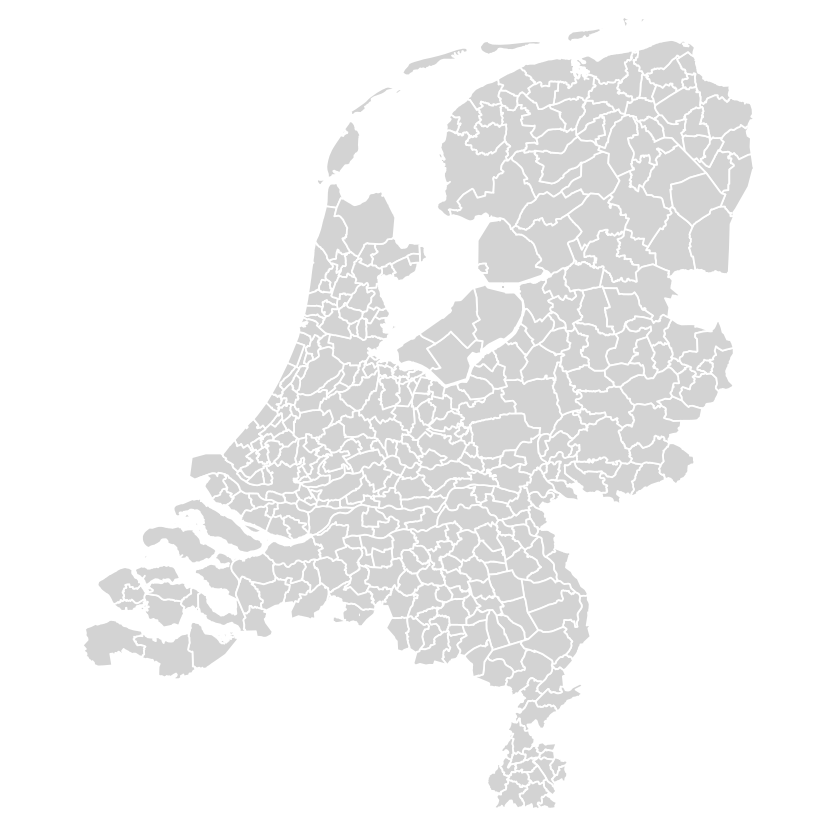

In [22]:
AddMapLayer(MapPlot(), map_municipal)

## Assignment 2c

Read in the pc4 locations (nld_pc4_locations.csv).

Hint: Don't forget the X and Y should be numeric variables!

In [32]:
pc4_locations <- read.csv2("../SourceData/nld_pc4_locations.csv")

pc4_locations$X <- as.numeric(as.character(pc4_locations$X))
pc4_locations$Y <- as.numeric(as.character(pc4_locations$Y))

str(pc4_locations)


'data.frame':	4066 obs. of  3 variables:
 $ PC4: int  1011 1012 1013 1014 1015 1016 1017 1018 1019 1021 ...
 $ X  : num  122244 121613 120325 119515 120740 ...
 $ Y  : num  487223 487555 489672 489422 488009 ...


## Assignment 2d

### 2di

Read in the school data


In [75]:
schools <- read.csv2("../SourceData/schools.csv")
head(schools)

PROVINCIE,BEVOEGD.GEZAG.NUMMER,BRIN.NUMMER,VESTIGINGSNUMMER,VESTIGINGSNAAM,STRAATNAAM,HUISNUMMER.TOEVOEGING,POSTCODE,PLAATSNAAM,GEMEENTENUMMER,...,RPA.GEBIED.CODE,RPA.GEBIED.NAAM,WGR.GEBIED.CODE,WGR.GEBIED.NAAM,COROPGEBIED.CODE,COROPGEBIED.NAAM,ONDERWIJSGEBIED.CODE,ONDERWIJSGEBIED.NAAM,RMC.REGIO.CODE,RMC.REGIO.NAAM
,41152,23HC,23HC04,RSG Lingecollege,,,,,NA,...,NA,,NA,,NA,,NA,,NA,
Drenthe,10053,18BR,18BR00,School voor Praktijkonderwijs Assen,Zwartwatersweg,202,9406 NN,ASSEN,106,...,3,Centraal-Groningen,7,Noord- en Midden-Drenthe,7,Noord-Drenthe,4,Assen-Hoogeveen-Emmen,7,Noord- en Midden Drenthe
Drenthe,10053,18BR,18BR01,School voor Praktijkonderwijs Assen,Bosrand,2,9401 SL,ASSEN,106,...,3,Centraal-Groningen,7,Noord- en Midden-Drenthe,7,Noord-Drenthe,4,Assen-Hoogeveen-Emmen,7,Noord- en Midden Drenthe
Drenthe,13273,20LO,20LO00,Openbare Scholengemeenschap Dr Nassau College voor Vwo Havo Mavo Vbo Lwoo,Mr Groen v Prinstererln,98,9402 KG,ASSEN,106,...,3,Centraal-Groningen,7,Noord- en Midden-Drenthe,7,Noord-Drenthe,4,Assen-Hoogeveen-Emmen,7,Noord- en Midden Drenthe
Drenthe,13273,20LO,20LO01,Openbare Scholengemeenschap Dr Nassau College voor Vwo Havo Mavo Vbo Lwoo,Schoolstraat,1,9331 AV,NORG,1699,...,3,Centraal-Groningen,7,Noord- en Midden-Drenthe,7,Noord-Drenthe,1,Groningen en omstreken,7,Noord- en Midden Drenthe
Drenthe,13273,20LO,20LO02,Openbare Scholengemeenschap Dr Nassau College voor Vwo Havo Mavo Vbo Lwoo,Esdoornlaan,2,9411 AV,BEILEN,1731,...,5,Zuid- en Midden-Drenthe,7,Noord- en Midden-Drenthe,7,Noord-Drenthe,4,Assen-Hoogeveen-Emmen,7,Noord- en Midden Drenthe


### 2dii

First, create a new dataframe schools1, which is equal to schools.

As you see POSTCODE has a structure of (1234 AB). You should create a new variable PC4 that is equal to the first 4 numbers in POSTCODE

Hint: Use the function `substr()`

Then select the variables PC4 and DENOMINATIE

In [84]:
print(schools$DENOMINATIE)

   [1] Openbaar                       Openbaar                      
   [3] Openbaar                       Openbaar                      
   [5] Openbaar                       Openbaar                      
   [7] Openbaar                       Openbaar                      
   [9] Openbaar                       Openbaar                      
  [11] Openbaar                       Openbaar                      
  [13] Openbaar                       Openbaar                      
  [15] Openbaar                       Openbaar                      
  [17] Algemeen bijzonder             Algemeen bijzonder            
  [19] Algemeen bijzonder             Algemeen bijzonder            
  [21] Algemeen bijzonder             Rooms-Katholiek               
  [23] Algemeen bijzonder             Algemeen bijzonder            
  [25] Protestants-Christelijk        Protestants-Christelijk       
  [27] Protestants-Christelijk        Algemeen bijzonder            
  [29] Openbaar                   

In [89]:
schools1 <- schools 

schools$POSTCODE<- as.character(schools$POSTCODE)

PC <- schools$POSTCODE

PC4 <- substr(PC, 1,5)

PC4


selected<-c(PC4,schools$DENOMINATIE)

print(selected)

[1] "     " "9406 " "9401 " "9402 " "9331 " "9411 " "9461 " "9402 " "9402 "
  [10] "9403 " "9406 " "7905 " "7905 " "7905 " "7905 " "7905 " "9404 " "9761 "
  [19] "7812 " "7944 " "7944 " "7824 " "9301 " "9301 " "7902 " "7903 " "7822 "
  [28] "7825 " "7943 " "7943 " "7943 " "7981 " "7943 " "7742 " "9402 " "7822 "
  [37] "7891 " "7822 " "7811 " "7861 " "9531 " "7822 " "9471 " "7941 " "7941 "
  [46] "9406 " "9405 " "9404 " "9411 " "9422 " "7944 " "8251 " "8251 " "8251 "
  [55] "8251 " "3891 " "8225 " "8322 " "1333 " "1335 " "1335 " "8321 " "8303 "
  [64] "8303 " "8232 " "1362 " "3891 " "8302 " "8302 " "8302 " "8302 " "8304 "
  [73] "8251 " "8251 " "8251 " "8224 " "8223 " "8233 " "1324 " "1326 " "1325 "
  [82] "1314 " "1353 " "1363 " "1323 " "1356 " "1336 " "1329 " "8302 " "8302 "
  [91] "8302 " "8321 " "1314 " "1325 " "1324 " "1363 " "1362 " "9163 " "8891 "
 [100] "8899 " "9201 " "9251 " "9231 " "9201 " "9202 " "9202 " "9251 " "9201 "
 [109] "8935 " "9291 " "8911 " "8931 " "8924 " "8915 " "8915 " "9076 " "9103 "
 [118] "8924 " "8935 " "8925 " "8862 " "8801 " "8862 " "8471 " "9285 " "8602 "
 [127] "8448 " "8934 " "8608 " "9285 " "9291 " "9103 " "9101 " "9101 " "9172 "
 [136] "9101 " "8601 " "8601 " "8601 " "8723 " "8731 " "8561 " "8701 " "8701 "
 [145] "9202 " "9202 " "9251 " "8434 " "9202 " "9251 " "8446 " "8446 " "8447 "
 [154] "8503 " "8802 " "8531 " "8561 " "8472 " "9076 " "8933 " "8921 " "8924 "
 [163] "9076 " "8933 " "8924 " "8932 " "8601 " "8601 " "8602 " "8431 " "8861 "
 [172] "8446 " "8441 " "8441 " "8446 " "8503 " "9001 " "8441 " "8401 " "9203 "
 [181] "8924 " "8601 " "9101 " "9254 " "9104 " "9166 " "6922 " "6922 " "6922 "
 [190] "6832 " "6832 " "6942 " "6843 " "6904 " "6942 " "6902 " "6903 " "6828 "
 [199] "6835 " "6661 " "6835 " "6661 " "6846 " "6824 " "6822 " "6812 " "6883 "
 [208] "6825 " "6827 " "6706 " "6706 " "4041 " "6709 " "4103 " "4103 " "4103 "
 [217] "4103 " "4191 " "3844 " "7206 " "7201 " "7314 " "7312 " "7322 " "7391 "
 [226] "7322 " "7312 " "4041 " "6532 " "7141 " "7131 " "3842 " "6865 " "7152 "
 [235] "7161 " "7161 " "6823 " "6523 " "6562 " "6523 " "6717 " "6717 " "6717 "
 [244] "6825 " "7231 " "7231 " "6717 " "6717 " "3862 " "6881 " "4102 " "4102 "
 [253] "8181 " "6891 " "6953 " "6952 " "7005 " "7271 " "7391 " "7005 " "4006 "
 [262] "4001 " "4001 " "4001 " "3842 " "3844 " "3842 " "3843 " "6543 " "6681 "
 [271] "6602 " "6524 " "7329 " "7314 " "7313 " "7312 " "6522 " "6533 " "6532 "
 [280] "6537 " "6533 " "6535 " "6533 " "6524 " "6525 " "6525 " "6603 " "6602 "
 [289] "6541 " "6541 " "6651 " "6658 " "6651 " "6511 " "6531 " "6546 " "6546 "
 [298] "6663 " "6663 " "3863 " "3863 " "3863 " "6822 " "6883 " "6826 " "6826 "
 [307] "6883 " "6826 " "8091 " "6671 " "6681 " "6661 " "6851 " "6681 " "6661 "
 [316] "3771 " "3771 " "3772 " "7333 " "5301 " "3844 " "3871 " "4041 " "3772 "
 [325] "6717 " "7316 " "7329 " "7316 " "7331 " "7316 " "7316 " "5301 " "5301 "
 [334] "3771 " "3772 " "7241 " "7271 " "7271 " "8162 " "8162 " "6715 " "7122 "
 [343] "7091 " "7101 " "7122 " "7002 " "7251 " "7251 " "7002 " "7008 " "7001 "
 [352] "7008 " "7204 " "7064 " "7064 " "7071 " "7102 " "7101 " "7009 " "7201 "
 [361] "7203 " "7204 " "7206 " "7204 " "7003 " "7161 " "7102 " "8082 " "8081 "
 [370] "8071 " "8081 " "4191 " "3851 " "3881 " "6574 " "7331 " "6713 " "6713 "
 [379] "7201 " "7204 " "7204 " "7316 " "3888 " "7316 " "9646 " "9641 " "9641 "
 [388] "9646 " "9989 " "9964 " "9981 " "9725 " "9951 " "9821 " "9951 " "9843 "
 [397] "9727 " "9751 " "9503 " "9675 " "9641 " "9501 " "9675 " "9591 " "9502 "
 [406] "9501 " "9501 " "9731 " "9726 " "9732 " "9743 " "9951 " "9602 " "9721 "
 [415] "9351 " "9351 " "9861 " "9351 " "9675 " "9671 " "9665 " "9695 " "9946 "
 [424] "9671 " "9673 " "9675 " "9675 " "9721 " "9801 " "9741 " "9731 " "9721 "
 [433] "9721 " "9561 " "9561 " "9741 " "9743 " "9713 " "9732 " "9711 " "9711 "
 [442] "9711 " "9731 " "9731 " "9732 " "9722 " "9751 " "9751 " "9721 " "9721 "
 [451] "9603 " "9601 " "9902 " "9932 " "9628 " "9902 

   [1] "     " "9406 " "9401 " "9402 " "9331 " "9411 " "9461 " "9402 " "9402 "
  [10] "9403 " "9406 " "7905 " "7905 " "7905 " "7905 " "7905 " "9404 " "9761 "
  [19] "7812 " "7944 " "7944 " "7824 " "9301 " "9301 " "7902 " "7903 " "7822 "
  [28] "7825 " "7943 " "7943 " "7943 " "7981 " "7943 " "7742 " "9402 " "7822 "
  [37] "7891 " "7822 " "7811 " "7861 " "9531 " "7822 " "9471 " "7941 " "7941 "
  [46] "9406 " "9405 " "9404 " "9411 " "9422 " "7944 " "8251 " "8251 " "8251 "
  [55] "8251 " "3891 " "8225 " "8322 " "1333 " "1335 " "1335 " "8321 " "8303 "
  [64] "8303 " "8232 " "1362 " "3891 " "8302 " "8302 " "8302 " "8302 " "8304 "
  [73] "8251 " "8251 " "8251 " "8224 " "8223 " "8233 " "1324 " "1326 " "1325 "
  [82] "1314 " "1353 " "1363 " "1323 " "1356 " "1336 " "1329 " "8302 " "8302 "
  [91] "8302 " "8321 " "1314 " "1325 " "1324 " "1363 " "1362 " "9163 " "8891 "
 [100] "8899 " "9201 " "9251 " "9231 " "9201 " "9202 " "9202 " "9251 " "9201 "
 [109] "8935 " "9291 " "8911 " "8931 " "8924 " "8915

### 2diii

Create the dataframe school_loc as a join from pc4_locations and school1 that combines the columns from both data frames, but only keeps rows where the value in the pc4_locations column matches in both data frames.
And then select the observations with DENOMINATIE is equal to "Rooms-Katholiek" or "Protestants-Christelijk"

In [82]:
school_loc <- merge(pc4_locations,school1,ID)

ERROR: Error in parse(text = x, srcfile = src): <text>:3:0: unexpected end of input
1: school_loc <- pc4_locations + school1 %>%
2:          mutate(school_loc=ifelse(pc4_locations=pc4_locations)) %>%
  ^


## Assignment 2e

Create a map of Catholic and Protestant schools in the Netherlands


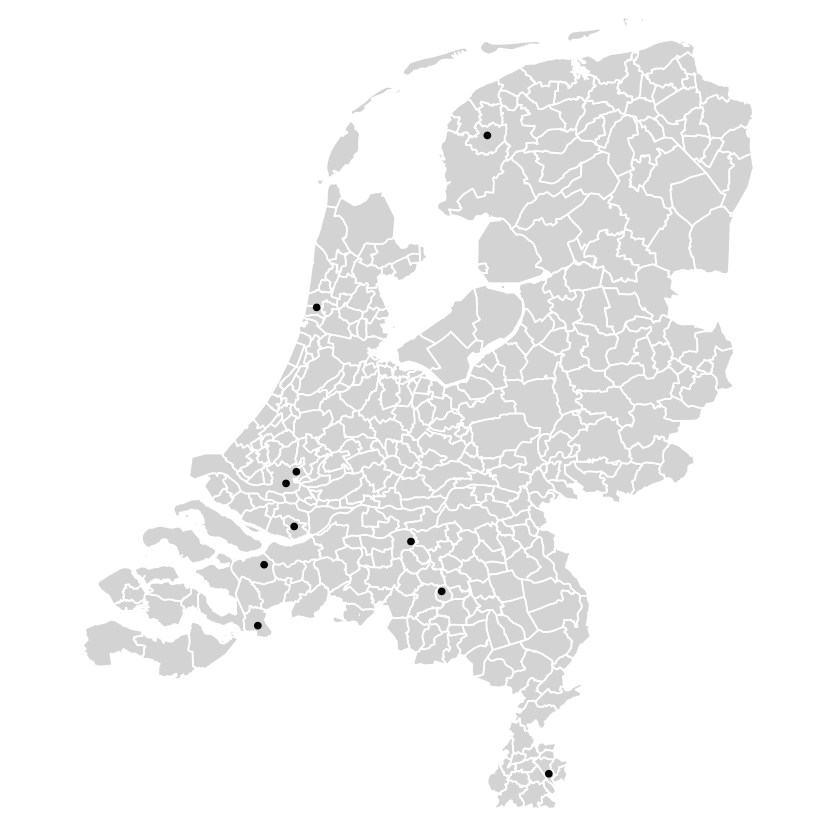

In [91]:
pc4_locations <- read.csv2("../SourceData/nld_pc4_locations.csv")%>%
  mutate(X = as.numeric(as.character(X))) %>%
   mutate(Y = as.numeric(as.character(Y)))

sample_locations <- pc4_locations %>%
  sample_n(10, replace = FALSE)

AddMapLayer(MapPlot(), map_municipal) %>%
  AddPointsLayer(sample_locations)

End of notebook